In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
#about data
#The dataset contains transactions made by credit cards in September 2013 by European cardholders.
#the features are the result of a PCA transformation(ue to confidentiality issues, we cannot provide the original features 
#and more background information about the data.)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#there are no missing values in tha dataset

In [9]:
data.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
data["Class"] = data["Class"].astype("category")

In [12]:
data.dtypes

Time       float64
V1         float64
V2         float64
V3         float64
V4         float64
V5         float64
V6         float64
V7         float64
V8         float64
V9         float64
V10        float64
V11        float64
V12        float64
V13        float64
V14        float64
V15        float64
V16        float64
V17        float64
V18        float64
V19        float64
V20        float64
V21        float64
V22        float64
V23        float64
V24        float64
V25        float64
V26        float64
V27        float64
V28        float64
Amount     float64
Class     category
dtype: object

In [13]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
data["Class"].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [15]:
#data has high imbalance(only 0.172% having fraud transcions)


In [16]:
data.duplicated().sum()

1081

In [17]:
data.drop_duplicates(keep=False,inplace=True)

In [18]:
data.duplicated().sum()

0

In [19]:
x = data.drop(["Class"],axis=1)
y = pd.DataFrame(data["Class"])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=123)

In [ ]:
x,y = smote.fit_resample(x,y)

In [ ]:
y.value_counts()

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=123)

In [21]:
y_train["Class"].value_counts(normalize=True)*100

0    99.837429
1     0.162571
Name: Class, dtype: float64

In [22]:
y_test["Class"].value_counts(normalize=True)*100

0    99.83743
1     0.16257
Name: Class, dtype: float64

In [23]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

In [24]:
cols = x_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [25]:
mapper = DataFrameMapper(
          [([cont_col],StandardScaler()) for cont_col in cols] ,df_out=True)

In [26]:
mapper.fit(x_train)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['Time'], StandardScaler()),
                          (['V1'], StandardScaler()),
                          (['V2'], StandardScaler()),
                          (['V3'], StandardScaler()),
                          (['V4'], StandardScaler()),
                          (['V5'], StandardScaler()),
                          (['V6'], StandardScaler()),
                          (['V7'], StandardScaler()),
                          (['V8'], StandardScaler()),
                          (['V9'], StandardScaler()),
                          (['V10'], StandardScaler()),
                          (['V11'], S...
                          (['V17'], StandardScaler()),
                          (['V18'], StandardScaler()),
                          (['V19'], StandardScaler()),
                          (['V20'], StandardScaler()),
                          (['V21'], StandardScaler()),
                          (['V22'], Standard

In [27]:
X_train = mapper.transform(x_train)
X_test = mapper.transform(x_test)

In [28]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [29]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [30]:
#1ST MODEL RANDOM FOREST 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf_rf = RandomForestClassifier(max_depth=5,max_features="sqrt",n_jobs=-1,class_weight="balanced")

In [33]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', n_jobs=-1)

In [34]:
y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

In [35]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Random Forest",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Random Forest,0.997924,0.902174,0.43342,0.585538,0.997438,0.847826,0.373206,0.518272


In [ ]:
#2ND MODEL DecisionTreeClassifier

In [36]:
clf_dt = DecisionTreeClassifier(max_depth=5,class_weight="balanced")
clf_dt.fit(X_train, y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

In [37]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTree",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Random Forest,0.997924,0.902174,0.433420,0.585538,0.997438,0.847826,0.373206,0.518272
1,DecisionTree,0.958372,0.972826,0.036639,0.070618,0.959676,0.847826,0.033248,0.063987


In [38]:
conf_matrix = confusion_matrix(y_train,y_pred_train)

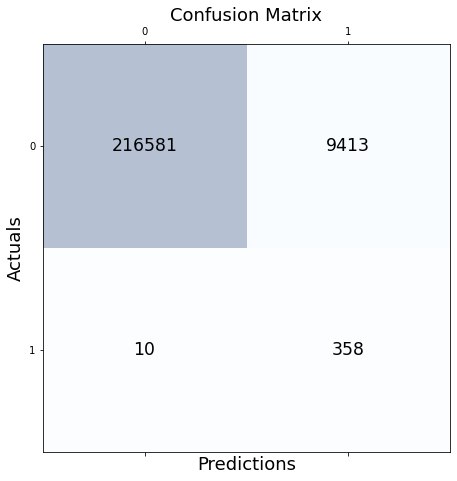

In [39]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [40]:
conf_matrix = confusion_matrix(y_test,y_pred_test)

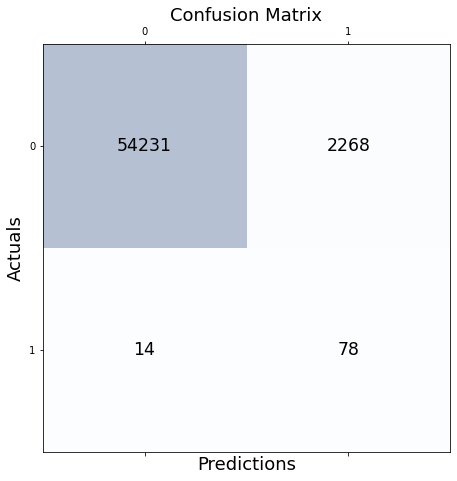

In [41]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1,max_depth=5,max_features=3)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_train_preds = model.predict(x_train)

In [ ]:
y_test_preds = model.predict(x_test)

In [ ]:
# predict probabilities
lr_probs = model.predict_proba(x_test)

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print(classification_report(y_train,y_train_preds))

In [ ]:
print(classification_report(y_test,y_test_preds))

In [ ]:
model.score(x_test,y_test)

In [ ]:
model.score(x_train,y_train)